# 用随机森林模型对葡萄酒质量进行预测

In [48]:
# 导入需要用的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

from sklearn.ensemble import IsolationForest
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
# !!! 只需要运行一次即可 !!!

In [49]:
# 初始化设置
plt.rcParams['font.sans-serif'] = ['SimHei']

In [50]:
# 导入数据
data = pd.read_excel("附件1.xlsx")
# data = pd.read_csv("data_finish1.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [51]:
data = data.replace('N',np.nan)

In [52]:
# 数据的缺失值处理

# # 通过均值算法处理缺失值
# for i in data.columns:
#     data[i] = data[i].fillna(-1)

# # 通过KNN算法处理缺失值
col = data.columns
data = pd.DataFrame(KNN(k=3).fit_transform(data))
data.columns = col

Imputing row 1/3898 with 0 missing, elapsed time: 4.089
Imputing row 101/3898 with 0 missing, elapsed time: 4.092
Imputing row 201/3898 with 0 missing, elapsed time: 4.093
Imputing row 301/3898 with 0 missing, elapsed time: 4.094
Imputing row 401/3898 with 0 missing, elapsed time: 4.094
Imputing row 501/3898 with 0 missing, elapsed time: 4.095
Imputing row 601/3898 with 0 missing, elapsed time: 4.096
Imputing row 701/3898 with 0 missing, elapsed time: 4.097
Imputing row 801/3898 with 0 missing, elapsed time: 4.098
Imputing row 901/3898 with 0 missing, elapsed time: 4.099
Imputing row 1001/3898 with 0 missing, elapsed time: 4.100
Imputing row 1101/3898 with 0 missing, elapsed time: 4.101
Imputing row 1201/3898 with 0 missing, elapsed time: 4.103
Imputing row 1301/3898 with 0 missing, elapsed time: 4.104
Imputing row 1401/3898 with 0 missing, elapsed time: 4.106
Imputing row 1501/3898 with 0 missing, elapsed time: 4.107
Imputing row 1601/3898 with 0 missing, elapsed time: 4.107
Imputing 

In [53]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,6.966260,0.275481,0.341625,6.384382,0.045546,35.568041,140.846152,0.994222,3.193315,0.488658,10.448865,5.878143
std,0.843729,0.100206,0.122805,5.111026,0.021846,16.976503,43.355255,0.002991,0.153421,0.114040,1.208069,0.910847
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,23.000000,110.000000,0.991900,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.200000,0.043000,34.000000,138.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.837500,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.000000,9.000000


In [54]:
# 数据描述
# 可以改为 print(data.describe())
print(data.describe())

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3898.000000       3898.000000  3898.000000     3898.000000   
mean        6.966260          0.275481     0.341625        6.384382   
std         0.843729          0.100206     0.122805        5.111026   
min         4.200000          0.080000     0.000000        0.600000   
25%         6.400000          0.210000     0.270000        1.700000   
50%         6.900000          0.260000     0.320000        5.200000   
75%         7.400000          0.320000     0.400000        9.837500   
max        14.200000          1.005000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3898.000000          3898.000000           3898.000000  3898.000000   
mean      0.045546            35.568041            140.846152     0.994222   
std       0.021846            16.976503             43.355255     0.002991   
min       0.009000             2.000000              9.

In [55]:
# 显示数据形状 
data.shape

(3898, 12)

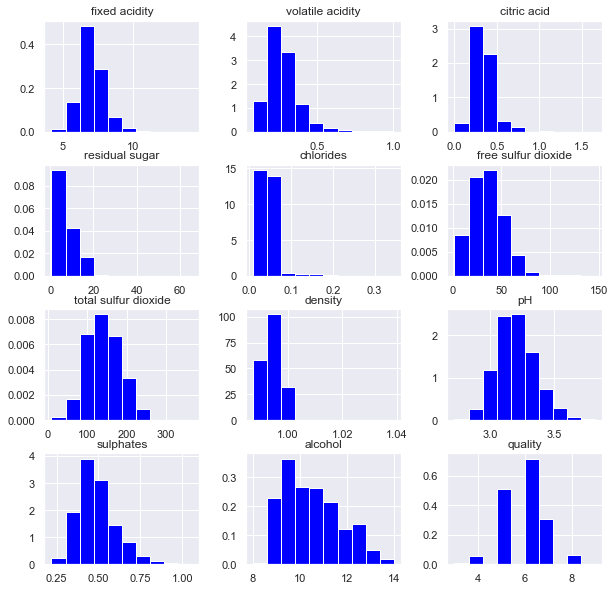

In [56]:
# 数据可视化
sns.set()
data.hist(figsize=(10,10), color='blue',density=True,histtype='bar')
plt.show()

In [57]:
# 异常数据处理

cols=data.columns

# 使用z-score处理异常值
data_zscore=data.copy() #复制一个用来存储Z-score得分的数据框
for col in cols:
    data_col=data[col]
    data_col_score=(data_col - data_col.mean()) / data_col.std()    # 计算每列的Z-score得分
    data_zscore[col] = data_col_score.abs() > 5                   # 判断Z-score得分是否大于2.5,如果是则为True,否则为False

data_drop_outlier = data[data_zscore==False]
data_drop_outlier.dropna(axis=0, how='any', inplace=True)

print(data_drop_outlier.shape)
data_drop_outlier.describe()

(3826, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,6.959823,0.273162,0.339031,6.363479,0.043810,35.358135,140.265760,0.994187,3.194655,0.488761,10.458802,5.890486
std,0.830452,0.095384,0.116485,4.983439,0.014379,16.511794,42.892305,0.002883,0.153556,0.114007,1.208609,0.907069
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.035000,23.000000,109.000000,0.991893,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.200000,0.042000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.390000,9.800000,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,10.700000,0.760000,0.880000,26.050000,0.152000,118.500000,344.000000,1.002950,3.820000,1.000000,14.000000,9.000000


In [58]:
#  数据保存为csv
data_drop_outlier.to_csv("data_finish.csv")

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

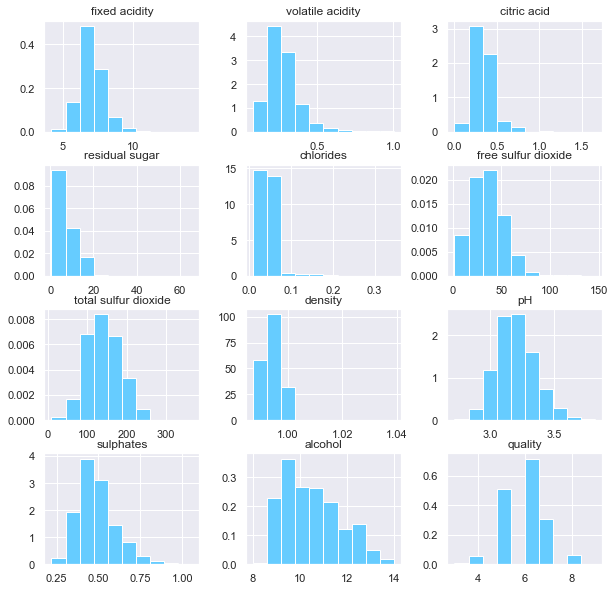

In [59]:
# 数据处理完毕的可视化
sns.set()
data.hist(figsize=(10,10), color='#66ccff',density=True,histtype='bar')
# # sns.countplot(data=data, x='quality')
# for col in cols:
#     sns.countplot(data=data,x=col)
#     plt.show()


<AxesSubplot:>

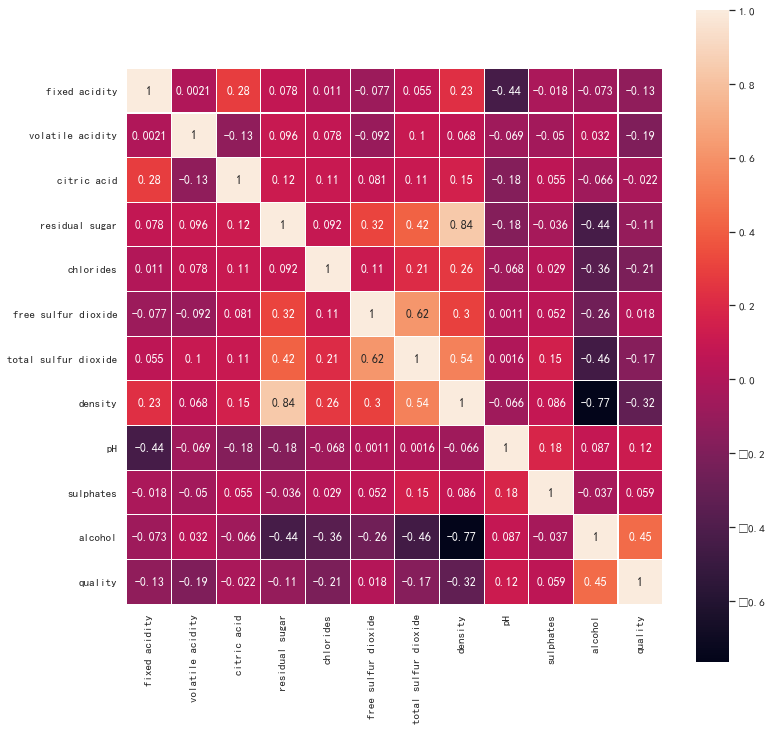

In [69]:
# 变量相关性
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.rcParams['font.sans-serif'] = ['FangSong'] 
# plt.title('相关性热点图', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [14]:
y = pd.DataFrame(data.quality)                  # 设置目标值
X = data.drop('quality', axis=1)  # 去除目标值
print(y.shape, X.shape)           # 检查样式

(3898, 1) (3898, 11)


## 准备使用随机森林进行模型的预测

In [15]:
# 测试数据处理
y = data.iloc[:,[11]]
X = data.iloc[:,0:11]
print(y.shape,X.shape)

(3898, 1) (3898, 11)


In [16]:
# 添加二分类
def chargeQuality(y):
    # 对红酒的质量进行分类
    # y.loc[y['quality']>=7,'quality']=2
    # y.loc[y['quality']>5,'quality']=1
    # y.loc[y['quality']>=3,'quality']=0
    return  y        # (y > 5).astype(int)
# y1 = y
y1 = chargeQuality(y)

Text(0.5, 0, '质量')

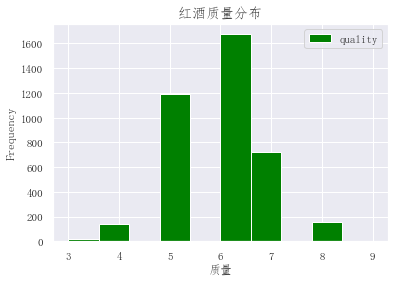

In [17]:
# 绘制预测结果
ax = y1.plot.hist(color='green')
plt.rcParams['font.sans-serif'] = ['FangSong'] 
ax.set_title('红酒质量分布', fontsize=14)
ax.set_xlabel('质量')

In [18]:
# 导入随机森林模型，
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [19]:
# 将数据分割为训练和测试数据集
import random
seed = int(random.random())        # 设置种子

test_data_size = 0.2               # 测试数据的占比

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=test_data_size,random_state=seed)

# 特征值归一化
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(3118, 11) (780, 11) (3118, 1) (780, 1)
(3118, 11) (780, 11) (3118, 1) (780, 1)


In [20]:
# 对随机森林分类器进行交叉验证训练和评价
RF_clf = GradientBoostingClassifier(random_state=seed)
RF_clf

GradientBoostingClassifier(random_state=0)

In [21]:
# 在训练数据集上计算k-fold交叉验证，并查看平均精度得分
cv_scores = cross_val_score(RF_clf,X_train_scaled, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.59294872 0.57371795 0.59294872 0.58012821 0.61217949 0.56410256
 0.61858974 0.52564103 0.57234727 0.60771704]
The mean accuracy score is 0.5840320718938081


## 执行预测

In [22]:
# 载入预测数据
testFileName = "附件1.xlsx"
testSheet = "待预测数据集"
data_test = pd.read_excel(testFileName,testSheet)

# 载入预测数据参考值
markFileName = "data_quatily.csv"
data_mark = pd.read_csv(markFileName)
y_test_mark = chargeQuality(data_mark)

In [23]:
print(y_test_mark.shape)
y_test_mark = pd.DataFrame(y_test_mark['quality'])
y_test_mark.shape

(1000, 12)


(1000, 1)

In [24]:
# 预测数据检测
print(data_test.shape)
data_test.describe()

(1000, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,6.420800,0.288610,0.305290,6.434950,0.046666,34.310500,128.602500,0.993270,3.16859,0.494480,10.765780
std,0.690307,0.101661,0.109133,4.920303,0.021835,17.093582,37.443361,0.002870,0.13951,0.114398,1.281803
min,3.800000,0.090000,0.000000,0.700000,0.013000,3.000000,10.000000,0.987110,2.80000,0.260000,8.400000
25%,6.000000,0.220000,0.250000,1.900000,0.036000,23.000000,103.000000,0.990927,3.08000,0.410000,9.600000
50%,6.400000,0.272500,0.290000,5.275000,0.044000,32.500000,122.500000,0.992960,3.17000,0.480000,10.700000
75%,6.800000,0.330000,0.350000,9.925000,0.051000,44.000000,152.000000,0.995380,3.25000,0.560000,11.700000
max,9.000000,1.100000,0.910000,22.600000,0.271000,289.000000,440.000000,1.000380,3.76000,1.080000,14.200000


In [25]:
# 预测数据特征归一化
data_test_scaled = scaler.fit_transform(data_test)

In [26]:
print(y_train.shape)

(3118, 1)


In [37]:
RF_clf.fit(X_train_scaled, y_train)

# 梯度决策树
# clf = GradientBoostingClassifier(n_estimators=40,  learning_rate=0.2, max_depth=1)

# 随机森林
RF_clf.fit(X_train_scaled,y_train)
pred_RF = RF_clf.predict(data_test_scaled)

print(accuracy_score(y_test_mark, pred_RF))
# print(log_loss(y_test_mark, pred_RF))

# pred_RF = RF_clf.predict(data_test_scaled)
# pred_RF = pd.DataFrame(pred_RF)

0.481


6.0    574
5.0    227
4.0     74
3.0     60
7.0     37
9.0     20
8.0      8
dtype: int64

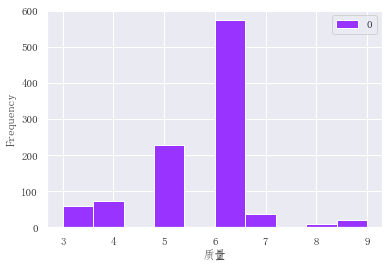

In [47]:
# 绘制预测结果
import seaborn as sns

out_data = pd.DataFrame(pred_RF)
ax = out_data.plot.hist(color='#9933FF')
plt.rcParams['font.sans-serif'] = ['FangSong'] 
# ax.set_title('红酒质量分布', fontsize=14)
ax.set_xlabel('质量')
out_data.value_counts()

In [28]:
# # 显示前5个结果和真实值
# for i in [1,2,3]:
#     print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_RF[i])

In [29]:
print(accuracy_score(y_test_mark, pred_RF))
outData = pd.DataFrame(pred_RF)
outData.to_csv("predict_of_2Level.csv")
# print(log_loss(y_test_mark, pred_RF))

0.481


In [30]:
print(confusion_matrix(y_test_mark, pred_RF))

[[  0   1   0   0   0   0   0]
 [  9   7   4   6   0   0   0]
 [ 12  36 108  98   3   2  10]
 [ 18  25 108 348  16   4   4]
 [ 13   4   6 116  18   2   2]
 [  8   1   1   6   0   0   4]
 [  0   0   0   0   0   0   0]]


In [31]:
# from sklearn.model_selection import GridSearchCV
# grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
# grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')
# grid_RF.fit(X_train_scaled, y_train)

In [32]:
# grid_RF.best_params_

In [33]:
# RF_clf = RandomForestClassifier(n_estimators=100,random_state=seed)
# RF_clf.fit(X_train,y_train)
# pred_RF = RF_clf.predict(X_test)
# print(accuracy_score(y_test,pred_RF))
# print(log_loss(y_test,pred_RF))

In [34]:
# print(confusion_matrix(y_test,pred_RF))